<center> <h1>Sujet : La politique des éditorialistes<h1> </center>
<center> <h1>Analyse NLP du récit politique dans les médias français<h1>  </center>


Encadrants : Salomé Do et Etienne Ollion

La première étape de notre travail fut de nous documenter sur le NLP et sur le thème de notre sujet : les éditorialistes politiques français. Deux articles ont particulièrement structuré notre travail, *A simple but tough to beat baseline for sentence embeddings* de Arora S, Liang Y, Ma T et *Grandir l'événement. L'art et la manière de l'éditorialiste* de Riutord P. Ces papiers nous ont permis de mieux comprendre ce que nous pouvions faire avec le NLP et de saisir les caractéristiques spécifiques de 'l'édito politique' au sein des genres journalistiques. Ce travail préalable réalisé, nous avons pu problématiser notre sujet à partir de la base de données et de la lecture d'éditos. Nous avons donc défini à l'aide de nos encadrants 4 grands thèmes à explorer : 
1. Comment les éditorialistes argumentent-ils et y a-t-il des différences notables entre les radios ? (Usage d'arguments historiques, scientifiques, d'arguments d'autorité, plus ou moins grande technicité ...)
2. Sur quelles régions du monde portent les éditos et arrive-t-il souvent que les éditorialistes aient recours à des comparaisons internationales ?
3. Y a-t-il réellement une ressemblance entre le vocabulaire employé par l'éditorialiste et celui du commentateur sportif ? 

Il a été convenu que nous commencerions d'abord par travailler sur notre base en usant de méthodes de NLP 'classiques' puis que nous appliquerions des méthodes plus sophistiquées afin de pouvoir comparer les résultats obtenus. Nous vous présentons donc ici des analyses tirés de modèles simples qui utilisent surout la librairie spaCy.

In [26]:
%run Code_Hervé-Copy1.ipynb

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [06:28<00:00, 13.89s/it]
C:\Users\veve1\Anaconda3\lib\site-packages\spacy\language.py:639: UserWarning: [W033] Training a new parser or NER using a model with no lexeme normalization table. This may degrade the performance of the model to some degree. If this is intentional or the language you're using doesn't have a normalization table, please ignore this warning. If this is surprising, make sure you have the spacy-lookups-data package installed. The languages with lexeme normalization tables are currently: da, de, el, en, id, lb, pt, ru, sr, ta, th.
  **kwargs


## Quels sont les acteurs qui peuplent leur récit

Afin de repérer de qui les éditorialistes parlent, nous avons utilisé le **Named Entity Recognizer (NER)** de SpaCy qui à partir de modèles entrainés au préalable, détecte des entitées nommées et leur assigne 4 labels possibles: **LOC** s'il s'agit d'un lieu, **PER** pour une personne, **ORG** pour une organisation et **MISC** si le **NER** ne parvient pas vraiment à attribuer un label.

Les éditorialistes commentant l'actualité politique, on s'intéresse aux personnalités politiques qui sont evoquées dans les éditos. Pour cela, on crée une nouvelle entité nommée, **POL** pour Politicien qui repère toutes les personnes citées (grâce au **NER**) qui appartiennent à une liste de personnalités politiques.
Cette liste contient tous les ministres et présidents de la Ve République (c'est un choix arbitraire mais qui semble pertinent au vu des événements politiques couverts), les députés, sénateurs et eurodéputés en activité ainsi que les candidats à la présidentielle 2017 (qui consitue une bonne partie de nos éditos).

On peut donc analyser, qui sont parmis les personnalités politiques de notre liste, les plus citées.

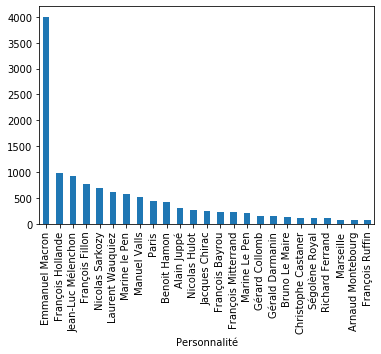

In [27]:
df_citations.groupby('Personnalité')['Nb Citations'].sum().sort_values(ascending=False).head(25).plot(kind='bar')

Emmanuel Macron, ministre, candidat à la présidentielle puis président de la République est la personnalité politique la plus citée. Vient ensuite Francçois Hollande, président pendant toute la période pré-campagne et campagne. Les (gros) candidats à la présidentielle 2017 sont également beacoup cités, du fait de l'année d'élection présidentielle 2017. D'anciens présidents comme Jacques Chirac ou François Mitterand sont fréquement cités.

Il est important de garder en tête que l'algorithme de trouve que ce qu l'on lui fait chercher, à savoir des noms issus d'une liste de ministres et présidents (passés et actuels), députés, sénateurs , eurodéputés et candidats en 2017. Et les noms à orthographes multiples peuvent se retrouver sous plusieurs formes. 
L'exemple qui suit le montre bien :

In [28]:
df_citations[df_citations['Personnalité']=='Marine Le Pen'].head()

,Auteur,Personnalité,Nb Citations
7,Dominique Tenza,Marine Le Pen,1
88,Frédéric Says,Marine Le Pen,146
435,Michaël Darmon,Marine Le Pen,13
477,Carine Bécard,Marine Le Pen,3
486,Yaël Goosz,Marine Le Pen,10


In [29]:
df_citations[df_citations['Personnalité']=='Marine le Pen'].head()

,Auteur,Personnalité,Nb Citations
208,Thomas Legrand,Marine le Pen,138
358,Alain Duhamel,Marine le Pen,111
552,Olivier Bost,Marine le Pen,22
655,Alba Ventura,Marine le Pen,272
852,Julien Fautrat,Marine le Pen,11


## L'argumentation de l'éditorialiste :
    
   ### Le journaliste impartial aux arguments étayés

Il est courant que l'éditorialiste cite des données factuelles, des chiffres, des rapports ou études pour étayer son propos. Nous avons donc créé une nouvelle entitité nommée, **EXP** pour expertise, qui correspond à l'évocation de rapport,d'études, chiffres...
Elle utilise des **matcher**, qui repèrent des bouts de phrases selon des règles fixés à l'avance. Par exemple, le mot rapport suivi d'un déterminant et d'un nombre, comme dans *Un Rapport de 2004*

In [30]:
test = nlp('Le dernier rapport sur le Climat, un rapport de 2020, par d\'une diminution de 9% des GES...deux français sur trois')
for match_id, start, end in clear_matcher_rapport(test):
    print(str(test[start:end]))
           
for match_id, start, end in clear_matcher_chiffres(test):
    print(str(test[start:end]))

rapport sur le Climat
rapport de 2020
2020
9%
deux français


In [31]:
df_expertise.sample(10)

,Auteur,Citations,Nbre
530,Frédéric Says,28 ans,1
5180,Dominique Seux,20.000 postes,1
732,Frédéric Says,2017 une classe,1
4614,Dominique Seux,dix millions,1
1072,Thomas Legrand,deux cas,1
4993,Dominique Seux,260 milliards,2
3127,Alba Ventura,2001,5
2087,Alain Duhamel,577 sièges,1
532,Frédéric Says,30 ans,7
208,Frédéric Says,sept déclinaisons,1


On se rend compte que dans les évocations de ce qu'on attend comme étant des 'Données chiffrées', des dates et des nombres qui n'ont pas grand choses à voir avec l'argumentation apparaissent. On peut au moins espérer que si notre 'filet' a des mailles trop fines, on ne rate pas grand chose...

On regarde qui parmi les éditorialistes présents dans notre base utilise le plus ces arguments "d'expertise".

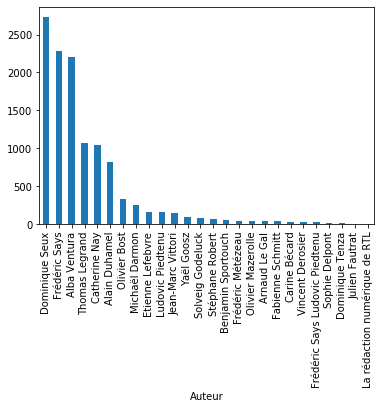

In [32]:
df_expertise.groupby('Auteur')['Nbre'].sum().sort_values(ascending=False).plot(kind='bar')

Pour les 2 questions évoquées ci-dessus, la faiblesse de la méthode vient du fait qu'il faut lister ou alors décrire entièrement tout ce que l'algorithme doit trouver. L'algorithme ne trouve que ce qui est exactement comme il doit le trouver.
Comme il n'est pas possible de préciser l'ensemble des cas possibles, il passera parfois à côté.
Ces problèmes seront résolus en entraînant nos propres modèles.